# Phase 2 - Milestone 1

**Ediashta Revindra Amirussalam**

FTDS-020-RMT

## Objective

## 00 - Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

## 01 - Data Loading

In [2]:
data = pd.read_csv('./churn.csv')

In [3]:
data.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [4]:
data_copy = data.copy()

## 02 - EDA

In [5]:
data.shape

(37010, 22)

In [6]:
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


In [7]:
data.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [8]:
data.duplicated().sum()

18

In [9]:
data[data.duplicated()].head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
3321,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,67.850000,1228.39,16.0,712.30,Yes,No,No,Not Applicable,No reason specified,0
9505,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,...,210.640000,46466.03,9.0,716.45,No,Yes,No,Not Applicable,Too many ads,0
11478,9ba8bf4d1e50100c,47,F,Town,Gold Membership,2016-07-10,No,Credit/Debit Card Offers,Both,Fiber_Optic,...,497.320000,15082.13,11.0,730.34,No,Yes,Yes,Unsolved,No reason specified,0
12589,8f39faa74b6607e7,26,F,City,Premium Membership,2015-10-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,116.140000,26377.39,0.0,710.31,Yes,No,Yes,Solved,No reason specified,0
14840,859745861c61ebef,35,M,City,Silver Membership,2016-03-27,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,1064.763315,42483.66,28.0,702.11,No,Yes,Yes,Solved in Follow-up,Too many ads,1


In [10]:
data.drop_duplicates(inplace=True)

data.shape

(36992, 22)

In [11]:
num_col = data.select_dtypes(include=np.number).columns.tolist()
cat_col = data.select_dtypes(include=object).columns.tolist()

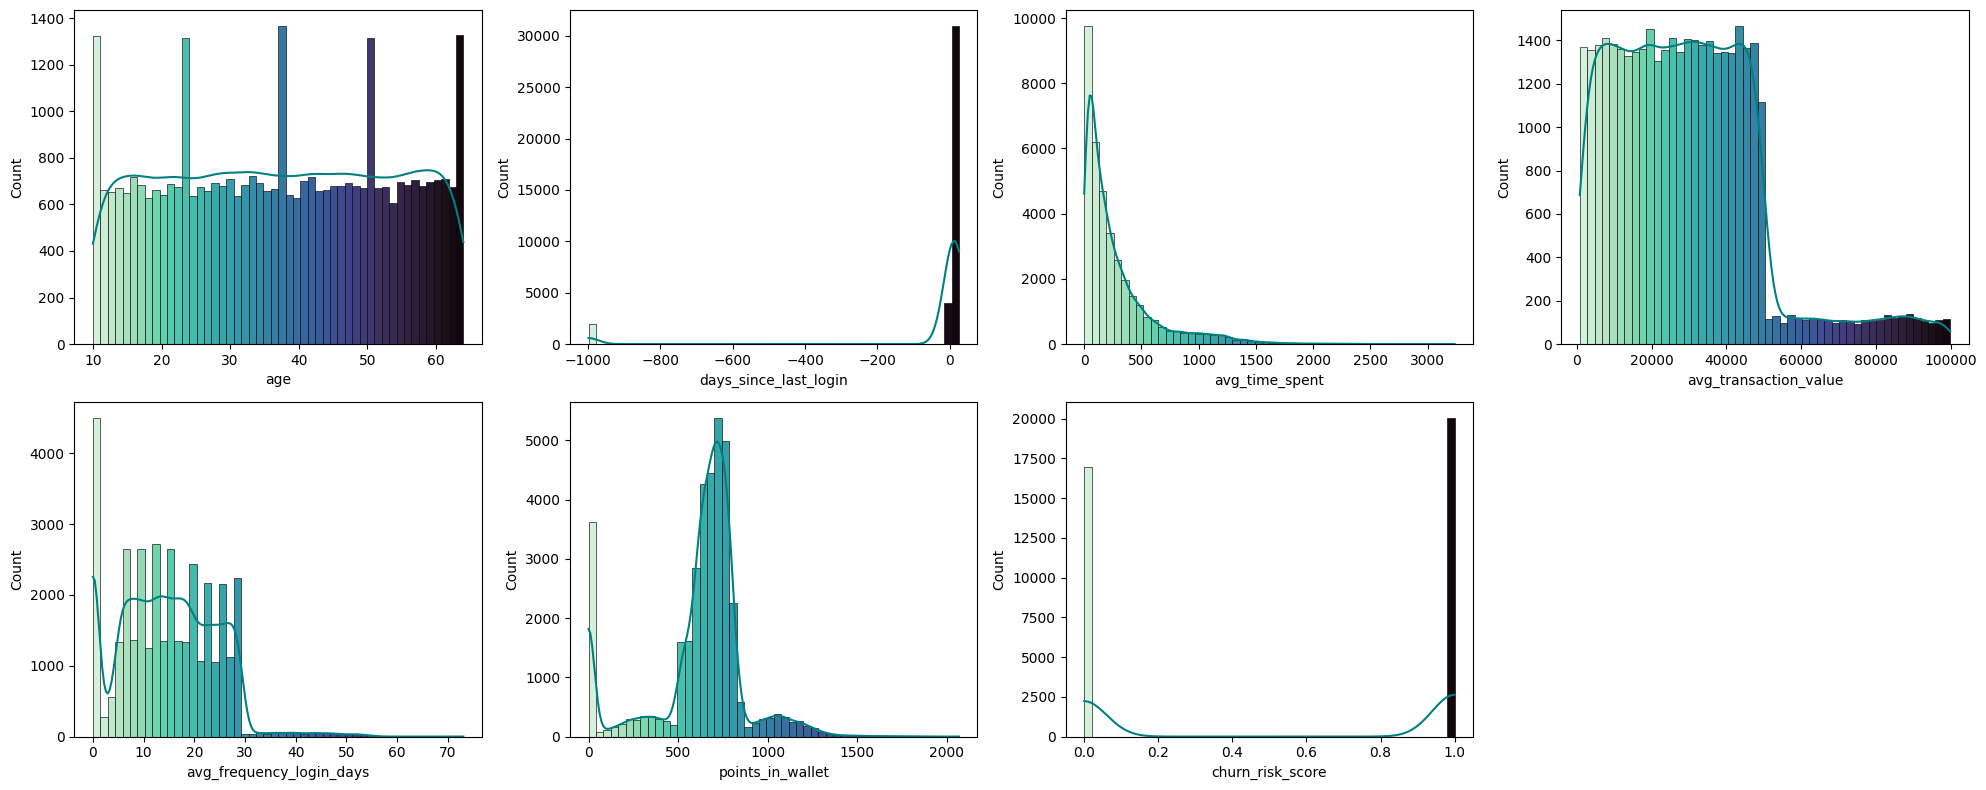

In [14]:
#check num distribution
plt.figure(figsize=(20,8))

palette = sns.color_palette("mako_r",50)

index = 1

for i in num_col:
    
    plt.subplot(2, 4, index)
    plot = sns.histplot(data=data, x=i, kde=True, bins=50, color="teal")

    for bin_,i in zip(plot.patches,palette):
        bin_.set_facecolor(i)
            
    index = index + 1

plt.tight_layout()


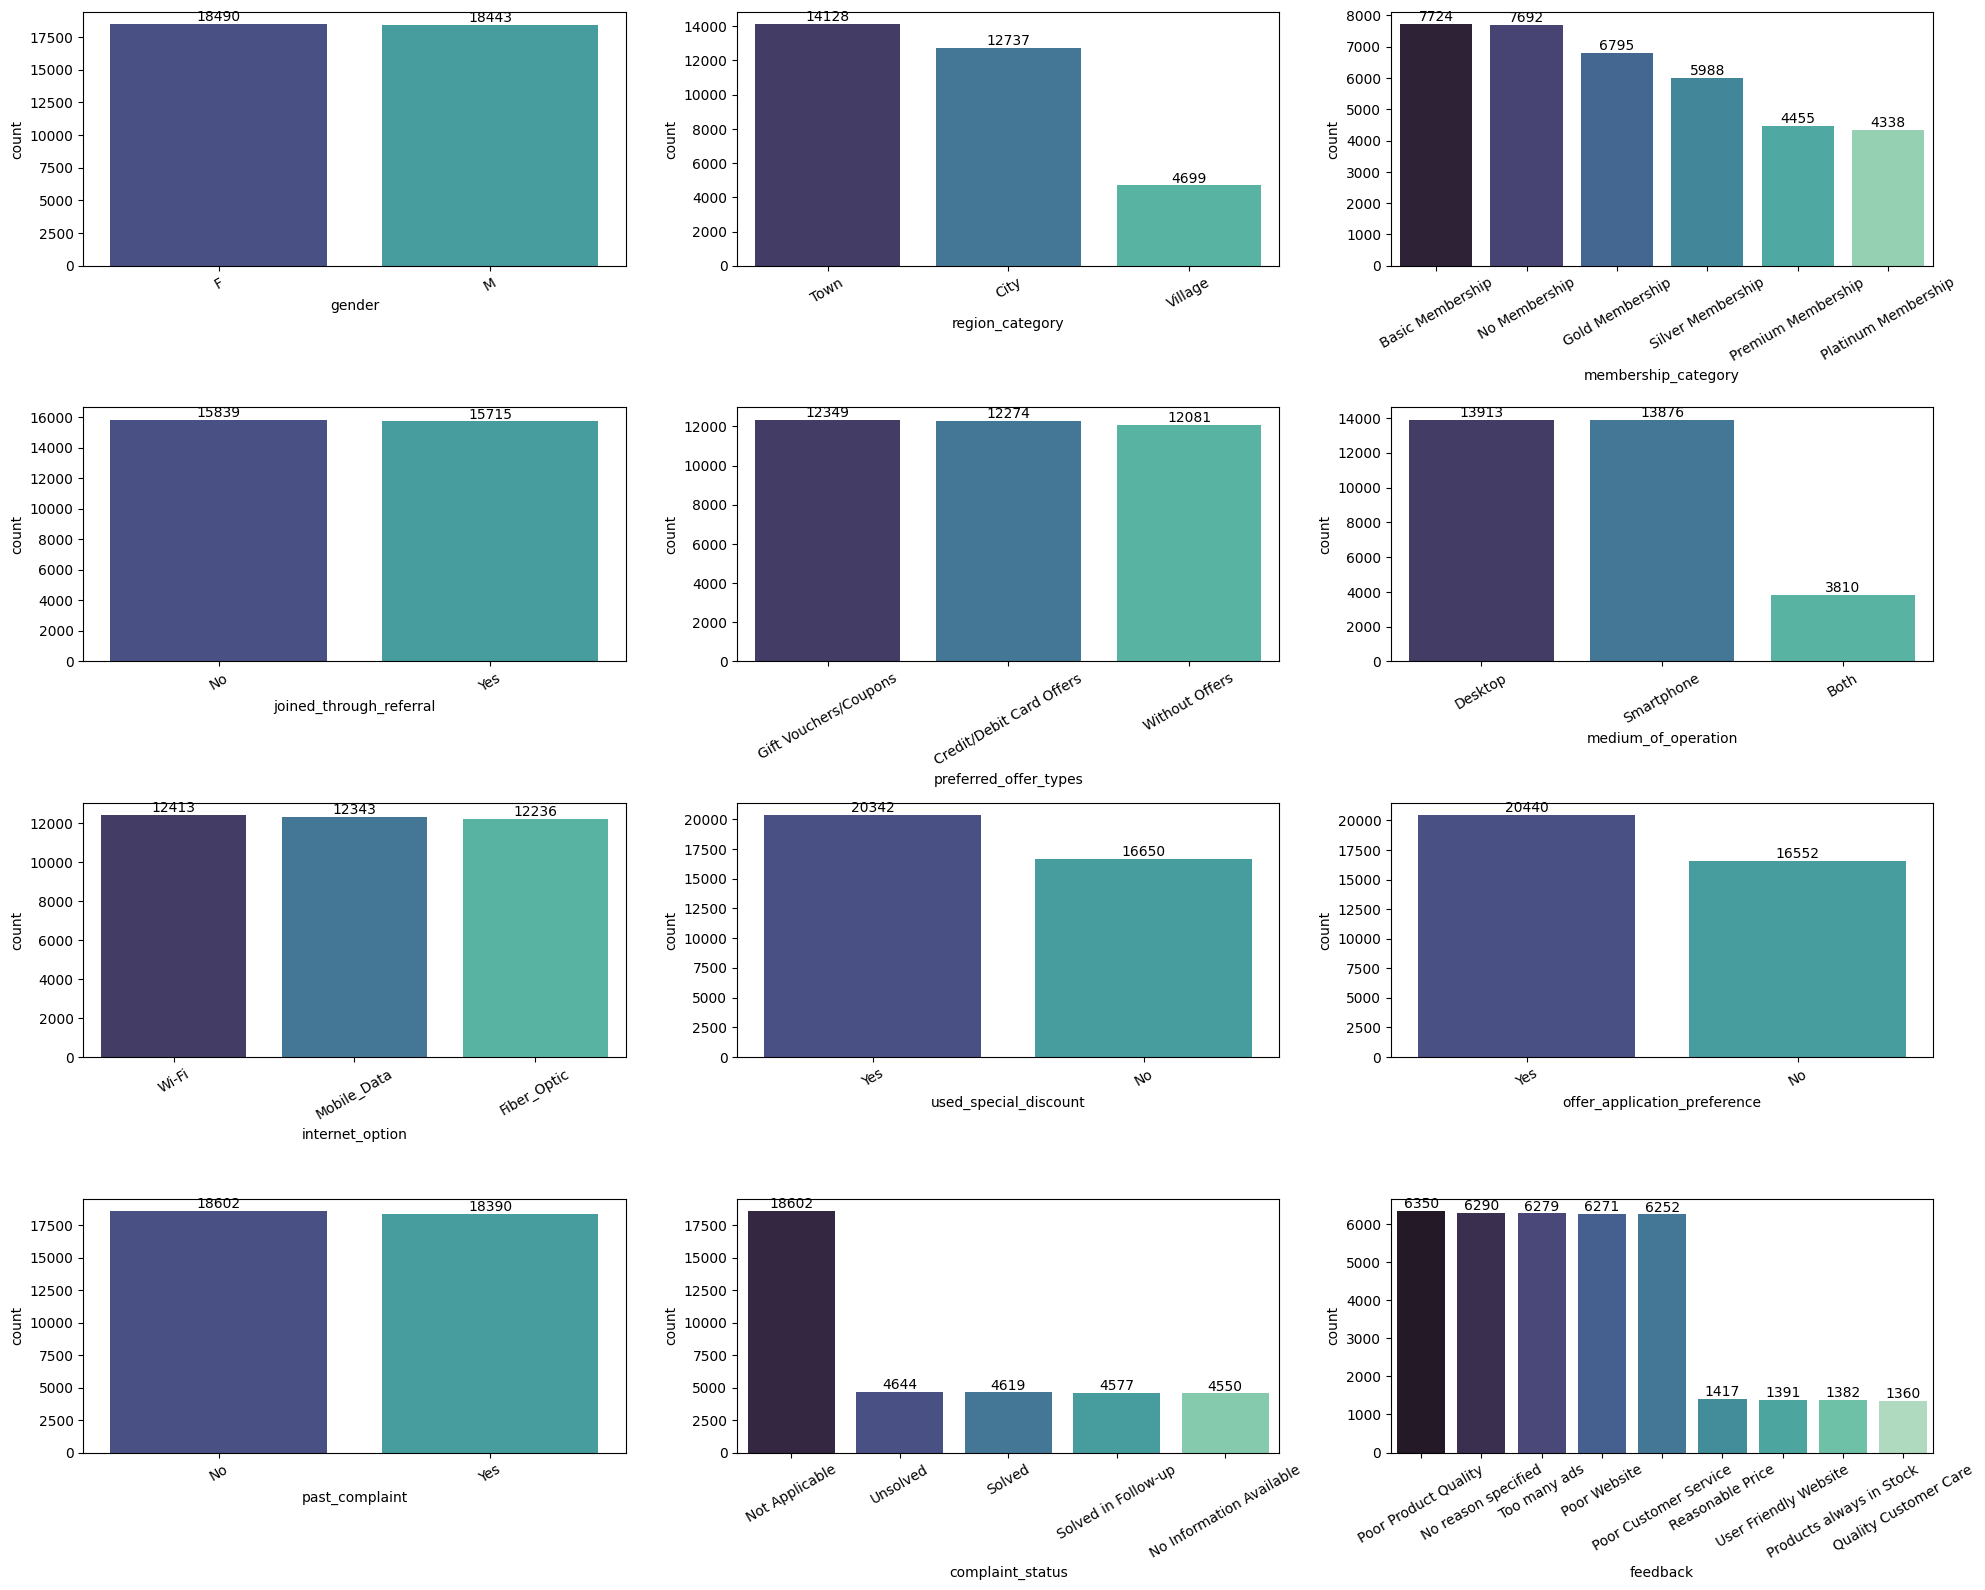

In [15]:
#check cat distribution
plt.figure(figsize=(20,16))

palette = sns.color_palette("mako_r",50)

index = 1

for i in cat_col:
    
    if i != 'user_id' and i !='joining_date' and i!='last_visit_time':
        plt.subplot(4, 3, index)
        plot = sns.countplot(data=data, x=i, palette='mako', order=data[i].value_counts().index)
        plt.bar_label(container=plot.containers[0], labels=data[i].value_counts().values)
        plt.xticks(rotation=30)
    else:
        index = index -1
                    
    index = index + 1

plt.tight_layout()


In [30]:
#def cramers_v
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

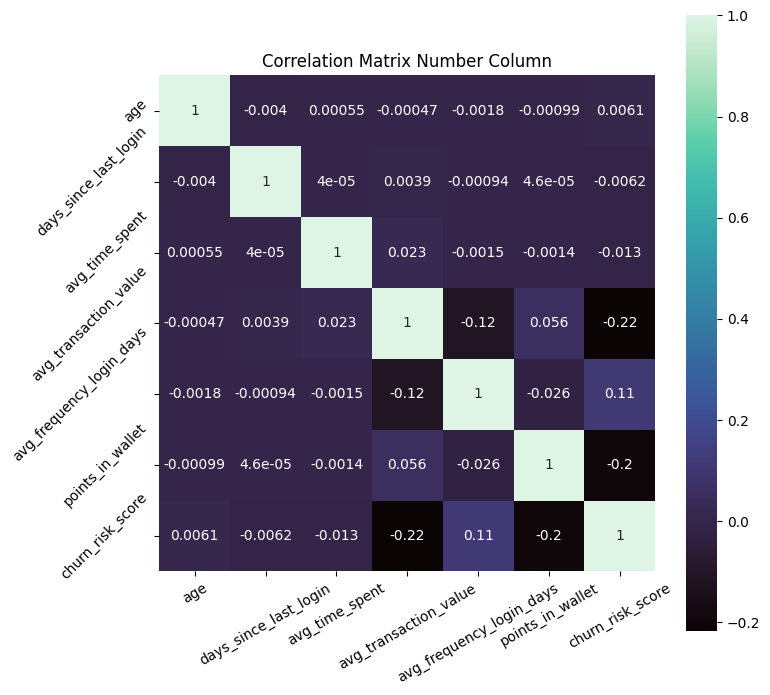

In [29]:
#check correlation

corr = data[num_col].corr(method="pearson")

plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='mako', square=True)
plt.xticks(rotation=30)
plt.yticks(rotation=45)
plt.title("Correlation Matrix Number Column")

plt.show()

In [35]:
#correlation for categorical
print("Correlation Categorical Columns")
for i in cat_col:
    if i != 'user_id':
        print(i, " :",round(cramers_v(data[i], data["churn_risk_score"]),4))
    

Correlation Categorical Columns
gender  : 0.0
region_category  : 0.0223
membership_category  : 0.7859
joining_date  : 0.0
joined_through_referral  : 0.0355
preferred_offer_types  : 0.0434
medium_of_operation  : 0.0218
internet_option  : 0.0025
last_visit_time  : 0.0604
used_special_discount  : 0.0092
offer_application_preference  : 0.0179
past_complaint  : 0.0072
complaint_status  : 0.0054
feedback  : 0.4561
